In [1]:
#goal: behavior of z, phi on separatrix (H=1), compare for different E vals
#z(phi, H) function, keep H fixed and change phi, get pairs of z/phi vals to get desired H, plug those in as params
#run multiple versions, plot on same graph

In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

import spinFuncts as sf

In [2]:
N  = 1        #system size
V  = 0        #coupling strength
L  = [10, 0]   #lambda prefix, Jzz_i

S1 = '200'    #spin of 1
S2 = '1/2'    #spin of 2

s1 = 200
s2 = 1/2

E=.5

In [3]:
times = np.linspace(0.0, 70.0, 1000)
phis = [0, .5, 1, 1.5, 2, 2.094]
#phis = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8, np.pi]
zs   = sf.getZs_Ec(phis, L[0], E)
print(zs)

[0.5203727897223193, 0.5018141827064835, 0.44366963948992805, 0.33663294314868036, 0.13229586603262614, 0.008487709067982355]


In [46]:
h1, h2 = sf.takeZphi (zs[0], phis[0], 0, 0)
J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)
H1 = sf.H_test(h1, J1)
vals, vects = H1.eigh()

phi1 = 0
z1   = 0
phi2 = 0
z2   = 0

h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
J1, J2, Jzz = sf.getJs(N, S1, S2, h1, h2)

H2 = sf.H_dyn(h1, h2, L, V, J1, J2, Jzz, s1, s2)

v_t = H2.evolve(vects.T[0], t0=0, times=times)

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


In [47]:
H_expt = H2.expt_value(v_t)
print(H_expt)

[101.82306043+0.00000000e+00j 101.82305921+4.00429285e-15j
 101.82305798-9.27332214e-16j 101.82305674+6.87565865e-16j
 101.82305551-6.66392722e-16j 101.82305427-3.42506015e-15j
 101.82305304-2.37979125e-15j 101.82305181-4.43518376e-16j
 101.82305058-1.98510136e-15j 101.82304935+4.07279262e-16j
 101.82304812+1.47769745e-15j 101.8230469 +1.62080605e-15j
 101.82304567+1.09594907e-15j 101.82304444-1.50329180e-15j
 101.82304321-1.01641747e-15j 101.82304199+2.77000079e-15j
 101.82304076-2.19841497e-15j 101.82303953+5.46820935e-16j
 101.82303831-1.89519368e-15j 101.82303708+5.71482602e-16j
 101.82303584-1.03891280e-15j 101.82303461-1.34948492e-15j
 101.82303337+4.40741034e-17j 101.82303214-4.44811620e-16j
 101.8230309 -8.41044084e-16j 101.82302966-5.52141335e-16j
 101.8230284 +1.00430014e-15j 101.82302712+5.44499139e-16j
 101.82302584+9.84784917e-17j 101.82302456-5.68615475e-16j
 101.82302328+1.58536027e-15j 101.82302202+7.95029578e-16j
 101.82302075+1.18925406e-15j 101.82301948+7.27088722e-1

In [3]:
def evolveSys(z1, phi1, z2, phi2, times, S1, s1, S2, s2, L, V, N):
    h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
    J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)
    H1 = sf.H_ini(h1, h2, J1, J2)
    vals, vects = H1.eigh()
    
    phi1 = 0
    z1   = 0
    phi2 = 0
    z2   = 0
    h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
    J1, J2, Jzz = sf.getJs(N, S1, S2, h1, h2)
    H2 = sf.H_dyn(h1, h2, L, V, J1, J2, Jzz, s1, s2)
    v_t = H2.evolve(vects.T[0], t0=0, times=times)
    
    J1_time, J2_time = sf.getObs(v_t, times, J1, J2)
    z1, phi1, z2, phi2 = sf.makeZphi_J(J1_time, J2_time)
    
    return [z1, z2], [phi1,phi2]

In [39]:
# E=.5, L=5
phis = [0, .5, 1, 1.5, 2, 2.094]
zs   = sf.getZs_Ec(phis, L[0], .5)
times = np.linspace(0.0, 70.0, 1000)

In [15]:
phi0 = [3]
z0 = sf.getZs_Ec(phi0, 5, 1)

In [38]:
# E=1, L=5
phis = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8, np.pi]
zs   = sf.getZs_Ec(phis, L[0], 1)
print(zs)

[0.8000000000000033, 0.7912022994817409, 0.7633548156088719, 0.7123424714440574, 0.6324555320337049, 0.5187839105748755, 0.3705258769462588, 0.1934693226325932, 0.0]


In [31]:
times = np.linspace(0.0, 70.0, 1000)

z_ta, phi_ta = evolveSys(np.pi, 0, 0, 0, times, S1, s1, S2, s2, [5,0], V, N)
z_tb, phi_tb = evolveSys(zs[6], 0, 0, 0, times, S1, s1, S2, s2, [5,0], V, N)
z_tc, phi_tc = evolveSys(zs[7], 0, 0, 0, times, S1, s1, S2, s2, [5,0], V, N)

C:\Users\Rey\Desktop\code\spinFuncts.py:100: RuntimeWarning: invalid value encountered in sqrt
  h1[0] = np.sqrt(1-z1**2)*np.cos(phi1)
C:\Users\Rey\Desktop\code\spinFuncts.py:101: RuntimeWarning: invalid value encountered in sqrt
  h1[1] = np.sqrt(1-z1**2)*np.sin(phi1)
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: The following static operator strings contain non-hermitian couplings: ['z|', '+|', '-|']
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1


Display all 3 non-hermitian couplings? (y or n) 


TypeError: Hamiltonian not hermitian! To turn this check off set check_herm=False in hamiltonian.

C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'phi')

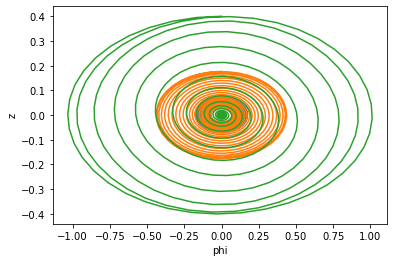

In [29]:
plt.plot(phi_ta[0], z_ta[0])
plt.plot(phi_tb[0], z_tb[0])
plt.plot(phi_tc[0], z_tc[0])

plt.ylabel('z')
plt.xlabel('phi')

C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time')

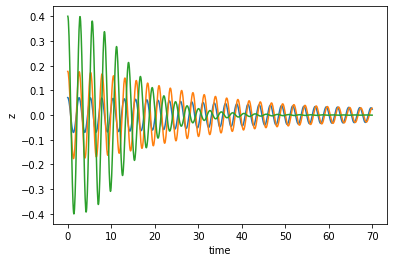

In [30]:
plt.plot(times, z_ta[0])
plt.plot(times, z_tb[0])
plt.plot(times, z_tc[0])

plt.ylabel('z')
plt.xlabel('time')

#print("z1(0) =", zs[0], ", phi1(0) =", phis[0])
#print("L =",L)

In [27]:
#function to take lambda, phi, H=const. and give the z value
#input array of phi vals and output array of z vals to use later?
#z, phi vals to be used as parameters z(0), phi(0)

def equalEz(L, phi):
    return np.sqrt(2)*(np.sqrt((-np.cos(phi)**2)/L**2 + np.sqrt(np.cos(phi)**2*(L**2-2*L+np.cos(phi)**2))/L**2+1/L))

In [29]:
def energy(z, phi, Lambda, E=0, t2=0):
    energy = Lambda/2*pow(z,2)-np.sqrt(1-z*z)*np.cos(phi) +t2*Lambda/2*z*np.sqrt(1-z*z)*np.sin(phi)
    return energy - E

def z_numInv(phi, Lambda, ec, t2=0):
    solp = optimize.root_scalar(energy, args=(phi, Lambda, ec, t2), bracket=[0,1])
    solm = optimize.root_scalar(energy,  args=(phi, Lambda, ec, t2), bracket=[0,-1])
    rp = solp.root 
    rm = solm.root 
    return np.array([rp,rm])

In [32]:
E1 = energy(zs[4], phis[4], L[0])
#rootz = z_numInv(0, 10, 1)
print(E1)

0.49999999999999994


In [53]:
# H = .5, L = 5: several phis, get zs
# error with phi > 2.094 (z-> 0)
phis = [0, .5, 1, 1.5, 2, np.pi*3.14]
zs = [] 
zi = z_numInv(np.pi*4, 5, .5)
zs.append(zi[0])

print(zs)

[0.6975715415611986]


In [53]:
phis = [0, .5, 1, 1.5, 2, 2.094]
zs   = []
for i in phis:
    zi = z_numInv(i, 5, .5)
    zs.append(zi[0])

print(zs)

[0.6975715415611986, 0.6770151135879416, 0.6093898257367951, 0.47424737863088623, 0.19135653622066495, 0.012332128772316384]


In [55]:
# need phi < 2.094, L is one val
def getZs_Ec(phis, L, E):
    zs   = []
    for i in phis:
        zi = z_numInv(i, L, E)
        zs.append(zi[0])
    return zs

In [57]:
print(getZs_Ec(phis, 5, .5))

[0.6975715415611986, 0.6770151135879416, 0.6093898257367951, 0.47424737863088623, 0.19135653622066495, 0.012332128772316384]
